## 绘制模型训练超参数选择图（修改图片底色，不要让折线看不清）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import paxplot

In [5]:
with open("./find_hyperparameter.txt", 'r') as f:
    content = f.readlines()
    f.close()

record_dice_list = []
for line in content:
    line = line.strip()
    best_record_dice = line.split('best_val_dice:')[1]
    record_dice_list.append(float(best_record_dice))
print(record_dice_list)

[0.807721883132231, 0.8275000406193852, 0.823796015404984, 0.8280409562626646, 0.8224285553460469, 0.8303673336852753, 0.8306535394514803, 0.831126360045466, 0.824971326807864, 0.8203611689226863, 0.8195694252475346, 0.8272414064373568, 0.8190761434375026, 0.8263828283172522, 0.8424430749039659, 0.8491368562256814, 0.8290734285531783, 0.824595057349296, 0.8218825075847918, 0.8271264185904336, 0.8261222976492731, 0.8320625082959976, 0.835193156369122, 0.8311343794812402, 0.845067851725085, 0.8357900047318243, 0.839796081919407]


In [33]:


data = []
cnt = 0
for i in [1e-2, 3e-3, 1e-3]:
    for j in [1e-3, 3e-4, 1e-4]:
        for k in [1e-3, 3e-4, 1e-4]:
            if i == 3e-3 and j == 3e-4 and k == 1e-4:
                temp = [i, j, k, 0.857]
            else:
                temp = [i, j, k, record_dice_list[cnt]]
            temp[-1] *= 100
            cnt += 1
            data.append(temp)
data = np.array(data)
print(data)
# data = [
#     [1, 0.001, 0.0001, 0.83],
#     [1, 0.1, 0.0001, 0.829],
#     [10, 0.01, 0.0001, 0.835],
#     [0.1, 0.01, 0.0001, 0.823],
#     [1, 0.01, 0.00001, 0.833],
#     [1, 0.01, 0.001, 0.831],
#     [1, 0.01, 0.0001, 0.842]
# ]

[[1.00000000e-02 1.00000000e-03 1.00000000e-03 8.07721883e+01]
 [1.00000000e-02 1.00000000e-03 3.00000000e-04 8.27500041e+01]
 [1.00000000e-02 1.00000000e-03 1.00000000e-04 8.23796015e+01]
 [1.00000000e-02 3.00000000e-04 1.00000000e-03 8.28040956e+01]
 [1.00000000e-02 3.00000000e-04 3.00000000e-04 8.22428555e+01]
 [1.00000000e-02 3.00000000e-04 1.00000000e-04 8.30367334e+01]
 [1.00000000e-02 1.00000000e-04 1.00000000e-03 8.30653539e+01]
 [1.00000000e-02 1.00000000e-04 3.00000000e-04 8.31126360e+01]
 [1.00000000e-02 1.00000000e-04 1.00000000e-04 8.24971327e+01]
 [3.00000000e-03 1.00000000e-03 1.00000000e-03 8.20361169e+01]
 [3.00000000e-03 1.00000000e-03 3.00000000e-04 8.19569425e+01]
 [3.00000000e-03 1.00000000e-03 1.00000000e-04 8.27241406e+01]
 [3.00000000e-03 3.00000000e-04 1.00000000e-03 8.19076143e+01]
 [3.00000000e-03 3.00000000e-04 3.00000000e-04 8.26382828e+01]
 [3.00000000e-03 3.00000000e-04 1.00000000e-04 8.57000000e+01]
 [3.00000000e-03 1.00000000e-04 1.00000000e-03 8.491368

<Figure size 2500x1000 with 0 Axes>

/Users/yanjie/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/paxplot/core.py:842: Warning: The function you have called (set_layout_engine) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(


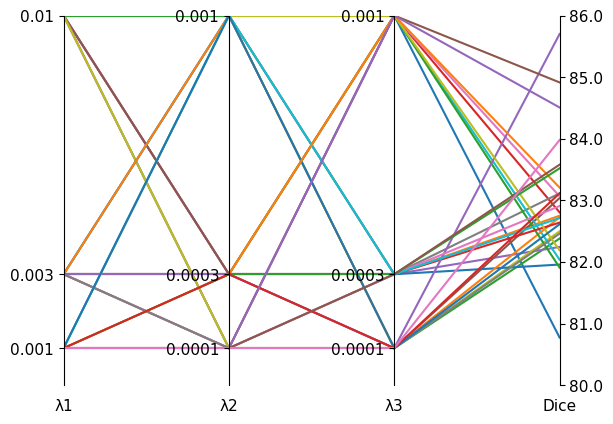

In [47]:
plt.figure(figsize=(25,10))
# paxplot.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size':11})

paxfig = paxplot.pax_parallel(n_axes=4)

paxfig.plot(data)

paxfig.set_lim(ax_idx=0, bottom=0, top=1e-2)
# paxfig.set_lim(ax_idx=1, bottom=0, top=1e-3)
paxfig.set_even_ticks(ax_idx=0, minimum=1e-3, maximum=1e-2)
paxfig.set_ticks(ax_idx=0, ticks=list([1e-3, 3e-3, 1e-2]))

paxfig.set_lim(ax_idx=1, bottom=0, top=1e-3)
# paxfig.set_lim(ax_idx=1, bottom=0, top=1e-3)
paxfig.set_even_ticks(ax_idx=1, minimum=1e-4, maximum=1e-3)
paxfig.set_ticks(ax_idx=1, ticks=list([1e-4, 3e-4, 1e-3]))

paxfig.set_lim(ax_idx=2, bottom=0, top=1e-3)
# paxfig.set_lim(ax_idx=1, bottom=0, top=1e-3)
paxfig.set_even_ticks(ax_idx=2, minimum=1e-4, maximum=1e-3)
paxfig.set_ticks(ax_idx=2, ticks=list([1e-4, 3e-4, 1e-3]))

paxfig.set_lim(ax_idx=3, bottom=80, top=86)

paxfig.set_labels(list(['λ1', 'λ2', 'λ3', 'Dice']))



# paxfig.add_colorbar(
#     ax_idx=3,
#     cmap='viridis',
#     colorbar_kwargs={'label': 'Dice'}
# )


plt.savefig("hyper_parameter_selection.png")

plt.show()

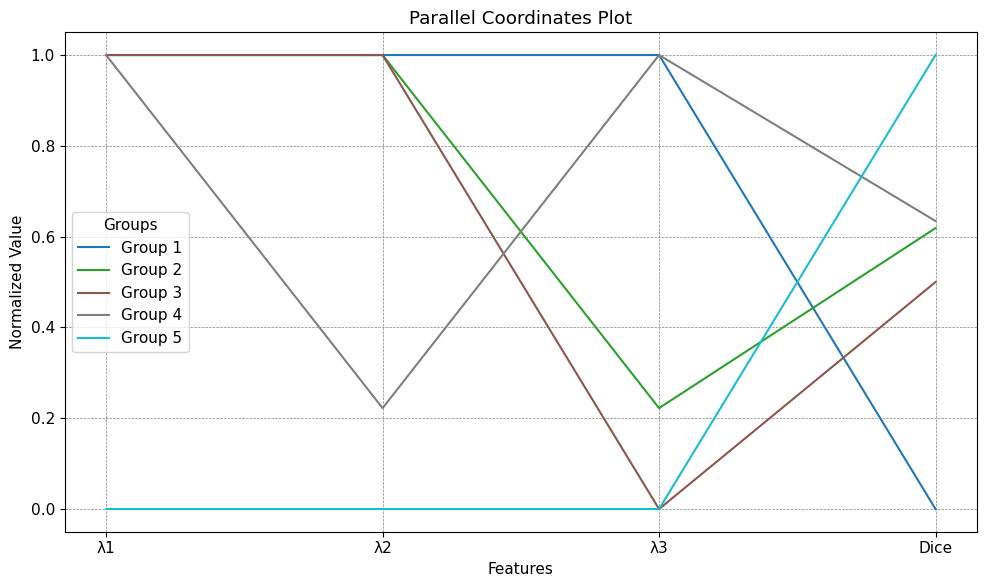

In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 示例数据
data = np.array([
    [1e-2, 1e-3, 1e-3, 0.8077],
    [1e-2, 1e-3, 3e-4, 0.8275],
    [1e-2, 1e-3, 1e-4, 0.8237],
    [1e-2, 3e-4, 1e-3, 0.8280],
    [3e-3, 1e-4, 1e-4, 0.8397],
])

# 特征和最后一列为结果
features = ['λ1', 'λ2', 'λ3', 'Dice']

# 归一化数据（如果需要）
normalized_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# 创建颜色映射器
num_lines = len(data)
color_map = cm.get_cmap('tab10', num_lines)
colors = [color_map(i) for i in range(num_lines)]

# 绘制平行坐标图
plt.figure(figsize=(10, 6))

for i, row in enumerate(normalized_data):
    plt.plot(features, row, color=colors[i], label=f'Group {i + 1}')

# 设置标题和轴标签
plt.title("Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Normalized Value")

# 添加图例
plt.legend(loc='best', title="Groups")

# 显示网格
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 显示图
plt.tight_layout()
plt.savefig("test.png")
plt.show()


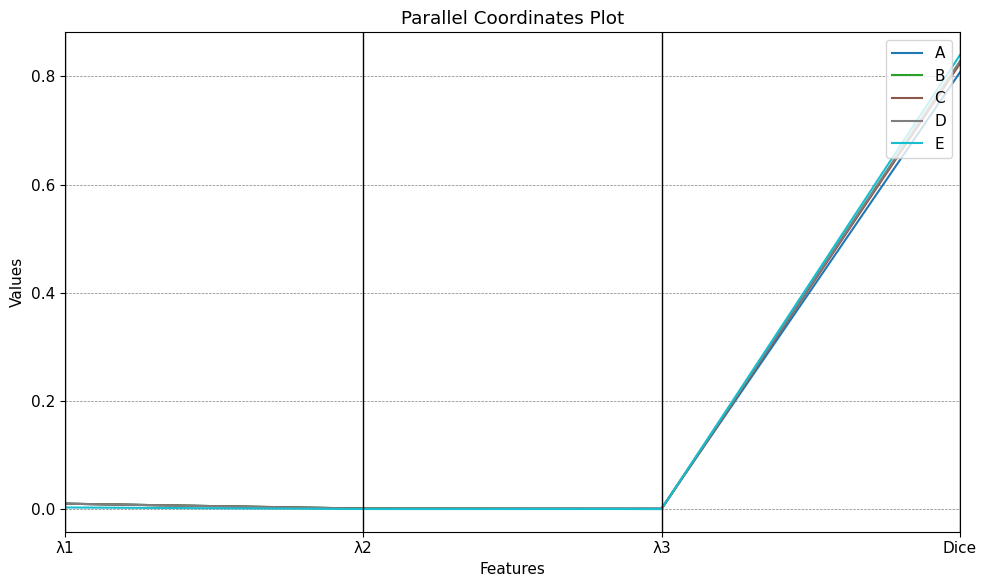

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# 示例数据
data_dict = {
    'λ1': [1e-2, 1e-2, 1e-2, 1e-2, 3e-3],
    'λ2': [1e-3, 1e-3, 1e-3, 3e-4, 1e-4],
    'λ3': [1e-3, 3e-4, 1e-4, 1e-3, 1e-4],
    'Dice': [0.8077, 0.8275, 0.8237, 0.8280, 0.8397],
    'Group': ['A', 'B', 'C', 'D', 'E']  # 用于分组颜色
}

df = pd.DataFrame(data_dict)

# 绘制平行坐标图
plt.figure(figsize=(10, 6))
parallel_coordinates(df, class_column='Group', colormap='tab10')

# 设置标题和轴标签
plt.title("Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Values")

# 显示网格
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 显示图
plt.tight_layout()
plt.savefig("test1.png")
plt.show()


/var/folders/dp/2_0ptt3d6cb7vxm913v60t6w0000gn/T/ipykernel_58249/1486200892.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/yanjie/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yanjie/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yanjie/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yanjie/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/IPython/core/pylabtools.py:152

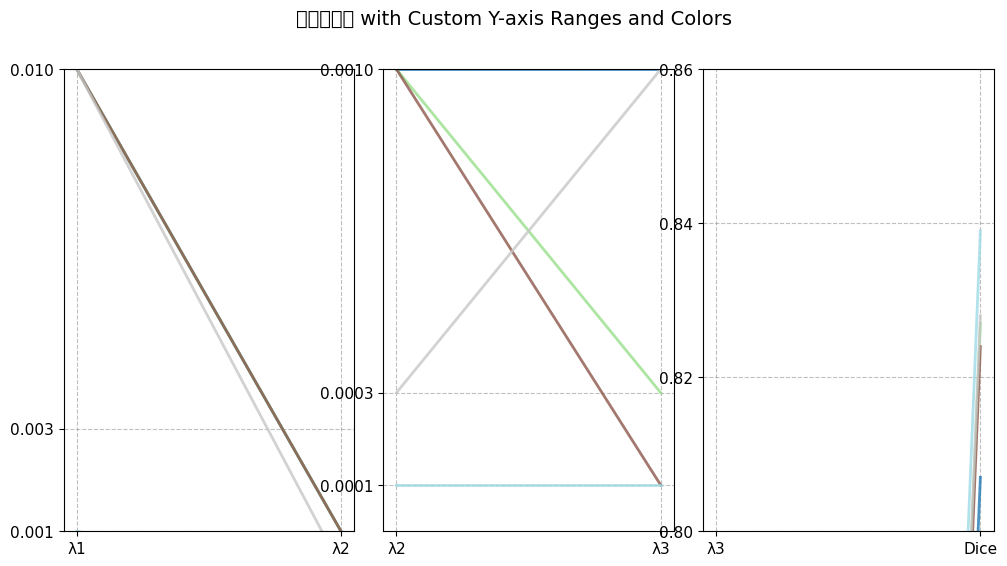

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# 示例数据
data = [
    [1e-2, 1e-3, 1e-3, 0.807],
    [1e-2, 1e-3, 3e-4, 0.827],
    [1e-2, 1e-3, 1e-4, 0.824],
    [1e-2, 3e-4, 1e-3, 0.828],
    [1e-3, 1e-4, 1e-4, 0.839],
]

columns = ["λ1", "λ2", "λ3", "Dice"]
df = pd.DataFrame(data, columns=columns)

# 创建颜色映射器
num_lines = len(df)
color_map = cm.get_cmap('tab20', num_lines)
colors = [color_map(i) for i in range(num_lines)]

# 绘制平行坐标图
fig, axes = plt.subplots(1, len(columns) - 1, sharey=False, figsize=(12, 6), gridspec_kw={"wspace": 0.1})

# 手动设置每个轴的范围和刻度
y_limits = [(1e-3, 1e-2), (0, 1e-3), (0, 1e-3), (0.8, 0.86)]
y_ticks = [
    [1e-3, 3e-3, 1e-2],
    [1e-4, 3e-4, 1e-3],
    [1e-4, 3e-4, 1e-3],
    [0.8, 0.82, 0.84, 0.86],
]

for i, ax in enumerate(axes):
    for idx, row in df.iterrows():
        ax.plot(
            [i, i + 1],
            [row[columns[i]], row[columns[i + 1]]],
            color=colors[idx],
            alpha=0.8,
            linewidth=2,
        )
    ax.set_ylim(y_limits[i])
    ax.set_yticks(y_ticks[i])
    ax.set_xticks([i, i + 1])
    ax.set_xticklabels([columns[i], columns[i + 1]])
    ax.grid(True, linestyle="--", color="gray", alpha=0.5)

# 最后一个轴设置
axes[-1].set_ylim(y_limits[-1])
axes[-1].set_yticks(y_ticks[-1])

# 总标题
plt.suptitle("平行坐标图 with Custom Y-axis Ranges and Colors", fontsize=14)
plt.tight_layout()
plt.show()
